<center>
    <h1>Madrid House Prices</h1>
    <br>
    <h2>Analysis of rental properties in Madrid</h2></center>

In [1048]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [1049]:
df = pd.read_excel('Houses_for_rent_madrid.xlsx')
df.rename(columns={'Sq. Mt.':'Sq_Meters'}, inplace=True)

<h2>Data Understanding</h2>

In [1050]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2188 entries, 0 to 2187
Data columns (total 15 columns):
Id               2188 non-null int64
Area             2188 non-null object
Address          2188 non-null object
Number           771 non-null object
Zone             2184 non-null object
Rent             2188 non-null int64
Bedrooms         2090 non-null float64
Sq_Meters        2188 non-null int64
Floor            2031 non-null float64
Outer            2006 non-null float64
Elevator         2042 non-null object
Penthouse        2188 non-null int64
Cottage          2188 non-null int64
Duplex           2188 non-null int64
Semi-detached    2188 non-null int64
dtypes: float64(3), int64(7), object(5)
memory usage: 256.5+ KB


In [1051]:
df.head()

,Id,Area,Address,Number,Zone,Rent,Bedrooms,Sq_Meters,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semi-detached
0,1,ciudad lineal,Piso en Quintana,NaN,Quintana,1300,2.0,72,3.0,1.0,1,0,0,0,0
1,2,ciudad lineal,Piso en calle de Arturo Soria,NaN,Costillares,3000,5.0,260,2.0,1.0,1,0,0,0,0
2,3,ciudad lineal,Piso en calle de Vicente Muzas,4,Colina,1300,2.0,100,3.0,1.0,1,0,0,0,0
3,4,ciudad lineal,Piso en calle Badajoz,NaN,San Pascual,1600,3.0,120,4.0,1.0,1,0,0,0,0
4,5,ciudad lineal,Piso en calle de Nuestra Señora del Villar,9,Ventas,800,2.0,60,3.0,1.0,0,0,0,0,0


We can delete both id and number since id doesn't add any value and number is full of NaNs.

In [1052]:
cols_to_drop = ['Id', 'Number']
df.drop(cols_to_drop, axis=1, inplace=True)

<h3>Data Cleaning</h3>

In [1053]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2188 entries, 0 to 2187
Data columns (total 13 columns):
Area             2188 non-null object
Address          2188 non-null object
Zone             2184 non-null object
Rent             2188 non-null int64
Bedrooms         2090 non-null float64
Sq_Meters        2188 non-null int64
Floor            2031 non-null float64
Outer            2006 non-null float64
Elevator         2042 non-null object
Penthouse        2188 non-null int64
Cottage          2188 non-null int64
Duplex           2188 non-null int64
Semi-detached    2188 non-null int64
dtypes: float64(3), int64(6), object(4)
memory usage: 222.3+ KB


In [1054]:
print(df.isnull().any())
print("\nThere are {} columns with nulls".format(sum(df.isnull().any())))

Area             False
Address          False
Zone              True
Rent             False
Bedrooms          True
Sq_Meters        False
Floor             True
Outer             True
Elevator          True
Penthouse        False
Cottage          False
Duplex           False
Semi-detached    False
dtype: bool

There are 5 columns with nulls


<h4>Area</h4>

20


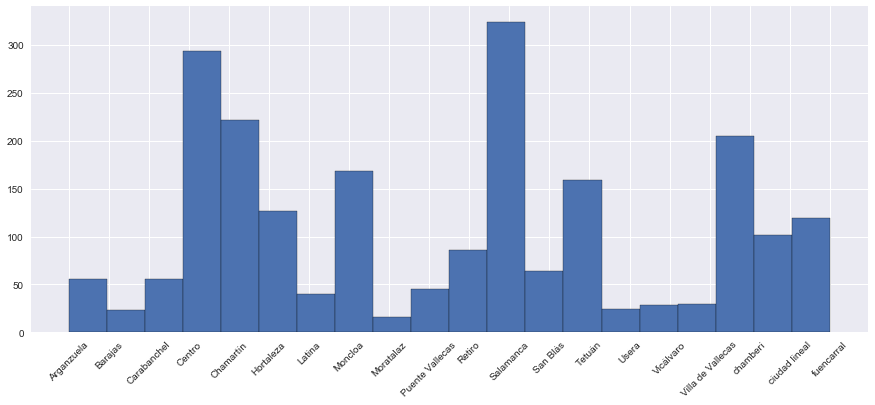

In [1055]:
print(df.Area.nunique())

plt.figure(figsize=(15,6))
plt.hist(df.Area, bins=20, ec='black')
plt.xticks(rotation=45)
plt.show()

In [1056]:
df.groupby('Area')['Rent'].agg('mean').sort_values(ascending=False)

Area
Moncloa              2920.708333
Salamanca            2801.095679
Hortaleza            2339.708661
Retiro               2264.534884
Chamartín            2157.378378
chamberí             2103.990244
Centro               1827.522184
ciudad lineal        1556.460784
fuencarral           1526.344538
Tetuán               1444.811321
Arganzuela           1221.750000
Barajas              1106.086957
San Blás             1070.296875
Moratalaz             920.625000
Latina                855.225000
Villa de Vallecas     852.166667
Usera                 820.625000
Carabanchel           757.892857
Puente Vallecas       729.444444
Vicálvaro             724.827586
Name: Rent, dtype: float64

<h4>Zone</h4>

In [1057]:
df[df.Zone.isnull()] # zone has four nulls

,Area,Address,Zone,Rent,Bedrooms,Sq_Meters,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semi-detached
1948,Tetuán,Piso en Bellas Vistas,NaN,1000,2.0,54,4.0,1.0,0,0,0,0,0
1954,Tetuán,Piso en Ventilla-Almenara,NaN,3500,4.0,190,5.0,1.0,1,0,0,0,0
1955,Tetuán,Piso en Cuzco-Castillejos,NaN,1250,2.0,77,5.0,1.0,1,0,0,0,0
1956,Tetuán,Piso en Cuatro Caminos,NaN,1750,1.0,74,15.0,1.0,1,0,0,0,0


In [1058]:
df[df.Address == 'Piso en Bellas Vistas']

,Area,Address,Zone,Rent,Bedrooms,Sq_Meters,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semi-detached
1948,Tetuán,Piso en Bellas Vistas,NaN,1000,2.0,54,4.0,1.0,0,0,0,0,0
1988,Tetuán,Piso en Bellas Vistas,Bellas Vistas,850,1.0,50,5.0,1.0,1,0,0,0,0
2096,Tetuán,Piso en Bellas Vistas,Bellas Vistas,850,1.0,75,4.0,1.0,1,0,0,0,0


In [1059]:
df.loc[1948, 'Zone'] = 'Bellas Vistas'
df.loc[1954, 'Zone'] = 'Ventilla-Almenara'
df.loc[1955, 'Zone'] = 'Cuzco-Castillejos'
df.loc[1956, 'Zone'] = 'Cuatro Caminos'

In [1060]:
print(len(df[df.Zone.isnull()]))
print(df.Zone.describe())

0
count          2188
unique          140
top       Recoletos
freq             98
Name: Zone, dtype: object


In [1061]:
df.groupby('Zone')['Rent'].agg('mean').sort_values(ascending=False)

Zone
El Plantío                              6563.333333
Ciudad Universitaria                    4622.130435
en El Viso                              4240.714286
chalet independiente en Nueva España    4200.000000
Jerónimos                               3977.692308
Conde Orgaz-Piovera                     3768.285714
en Almagro                              3700.000000
en Nueva España                         3550.000000
Recoletos                               3539.673469
en Trafalgar                            3500.000000
Castellana                              3242.727273
Valdemarín                              3240.370370
Aravaca                                 3203.333333
Almagro                                 3143.750000
El Viso                                 3009.400000
Niño JesÁºs                             2866.363636
en Ciudad Jardín                        2800.000000
Fuentelarreina                          2776.000000
Atalaya                                 2690.000000
en Nuev

<h4>Bedrooms</h4>

In [1062]:
null_beds = df[df.Bedrooms.isnull()]
null_beds

,Area,Address,Zone,Rent,Bedrooms,Sq_Meters,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semi-detached
11,ciudad lineal,Estudio en Costillares,Costillares,780,NaN,40,2.0,0.0,1,0,0,0,0
65,ciudad lineal,Estudio en Costillares,Costillares,780,NaN,40,0.0,1.0,1,0,0,0,0
70,ciudad lineal,Estudio en calle Juan Pascual,Pueblo Nuevo,625,NaN,30,0.0,1.0,1,0,0,0,0
91,ciudad lineal,Estudio en calle Rafael Bergamín,San Juan Bautista,800,NaN,40,4.0,1.0,1,0,0,0,0
95,ciudad lineal,Estudio en Colina,Colina,730,NaN,38,3.0,0.0,1,0,0,0,0
106,fuencarral,Estudio en calle de Badalona,Tres Olivos - Valverde,650,NaN,50,4.0,1.0,0,0,0,0,0
252,Hortaleza,Estudio en calle César Cort Botí,Valdebebas - Valdefuentes,900,NaN,45,2.0,1.0,1,0,0,0,0
294,Hortaleza,Dúplex en avenida de Manoteras,Virgen del Cortijo - Manoteras,840,NaN,80,1.0,1.0,1,0,0,1,0
326,Hortaleza,Estudio en avenida Papa Negro,Conde Orgaz-Piovera,700,NaN,35,3.0,1.0,1,0,0,0,0
373,Latina,Estudio en calle de herminio puertas,Puerta del Ángel,900,NaN,60,NaN,NaN,NaN,0,0,0,0


In [1063]:
null_beds.Sq_Meters.max()

90

The biggest flat with null values is 90 square meters and a majority seem to be studios or attics, so we will assume they are all have no bedrooms.

In [1064]:
df.Bedrooms.fillna(0, inplace=True)
df.Bedrooms = df.Bedrooms.astype(int)

In [1065]:
df.Bedrooms.describe()

count    2188.000000
mean        2.384369
std         1.379805
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: Bedrooms, dtype: float64

<h4>Floor</h4>

In [1066]:
nobeds = df[df.Floor.isnull()]
nobeds

,Area,Address,Zone,Rent,Bedrooms,Sq_Meters,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semi-detached
47,ciudad lineal,Chalet pareado en Concepción,Concepción,2599,4,310,NaN,NaN,NaN,0,1,0,0
51,ciudad lineal,Chalet adosado en San Juan Bautista,San Juan Bautista,3200,5,420,NaN,NaN,NaN,0,1,0,1
62,ciudad lineal,Piso en Concepción,Concepción,1235,3,122,NaN,NaN,NaN,0,0,0,0
63,ciudad lineal,Piso en Concepción,Concepción,1235,3,122,NaN,NaN,NaN,0,0,0,0
79,ciudad lineal,Chalet adosado en Arturo Soria,Costillares,3000,5,180,NaN,NaN,NaN,0,1,0,1
84,ciudad lineal,Piso en Concepción,Concepción,845,1,77,NaN,NaN,NaN,0,0,0,0
114,fuencarral,Caserón en calle Río Bullaque,La Paz,2100,4,171,NaN,NaN,NaN,0,1,0,0
153,fuencarral,Casa o chalet independiente en calle de la Peñ...,Mirasierra,2900,4,200,NaN,NaN,NaN,0,1,0,0
156,fuencarral,Piso en Fuentelarreina,Fuentelarreina,2400,4,219,NaN,NaN,NaN,0,0,0,0
166,fuencarral,Chalet adosado en Peñagrande,Peñagrande,3500,7,500,NaN,NaN,NaN,0,1,0,1


In [1067]:
nobeds.loc[(nobeds['Cottage'] == 1) | (nobeds['Semi-detached'] == 1), 'Floor'] = 0

/Users/cris/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [1068]:
df.loc[nobeds.index] = nobeds # replace
df['Floor'].fillna(df.Floor.median(), inplace=True)

In [1069]:
df.Floor.describe()

count     2188.000000
mean        23.060329
std        920.039668
min         -1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max      43039.000000
Name: Floor, dtype: float64

Looks like there are some mistakes on the floor column, I really doubt a buidling has over 43k floors.

In [1070]:
df.Floor.value_counts()

 3.0        435
 2.0        352
 1.0        345
 4.0        239
 0.0        217
 5.0        186
 6.0        149
 7.0         92
 8.0         41
 9.0         33
 10.0        24
 0.5         18
 11.0        13
 13.0        11
 17.0         5
 15.0         5
 14.0         5
-0.5          4
 12.0         3
 25.0         2
 23.0         1
 16.0         1
 28.0         1
 29.0         1
 20.0         1
 24.0         1
 26.0         1
-1.0          1
 43039.0      1
Name: Floor, dtype: int64

In [1071]:
df[df['Floor'] > 30]
df.drop(1484, axis=0, inplace=True)
df.Floor = df.Floor.astype(int).round()

<h4>Outer</h4>

In [1072]:
df.Outer.value_counts()

1.0    1741
0.0     265
Name: Outer, dtype: int64

In [1073]:
df.Outer.fillna(0, inplace=True)
df.Outer = df.Outer.astype(int)

<h4>Elevator</h4>

In [1074]:
df.Elevator.value_counts()

1           1796
0            244
Bajo           1
interior       1
Name: Elevator, dtype: int64

In [1075]:
df.Elevator.replace('Bajo ', 1, inplace=True)
df.Elevator.replace('interior', 1, inplace=True)
df.Elevator.fillna(0, inplace=True)
df.Elevator = df.Elevator.astype(int)

In [1076]:
print("There are {} columns with nulls".format(sum(df.isnull().any())))

There are 0 columns with nulls


That looks seems to be it for our nulls.

<h3>Feature Engineering</h3>

### Rent

In [1077]:
df['Rent'].describe()

count     2187.000000
mean      1943.899863
std       1522.672171
min        450.000000
25%        950.000000
50%       1400.000000
75%       2500.000000
max      16000.000000
Name: Rent, dtype: float64

Text(0.5,0,'Log Rent')

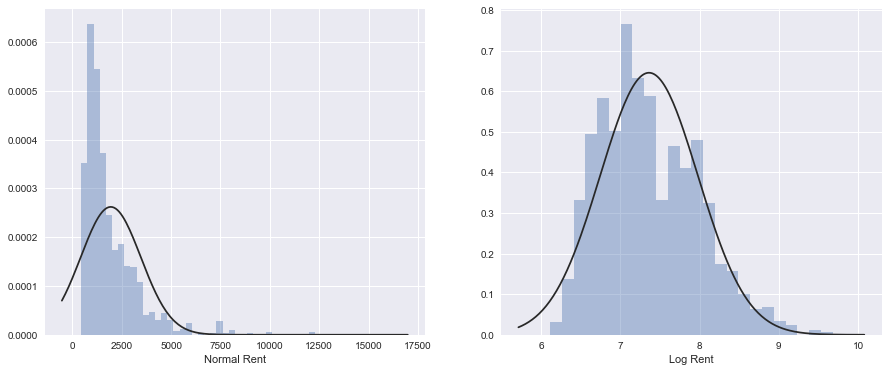

In [1078]:
from scipy.stats import norm, skew

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.distplot(df.Rent, kde=False, fit = norm)
plt.xlabel('Normal Rent')

plt.subplot(1, 2, 2)
sns.distplot(np.log(df.Rent + 1), kde=False, fit = norm)
plt.xlabel('Log Rent')

In [1079]:
df['Rent_Log'] = np.log1p(df.Rent)

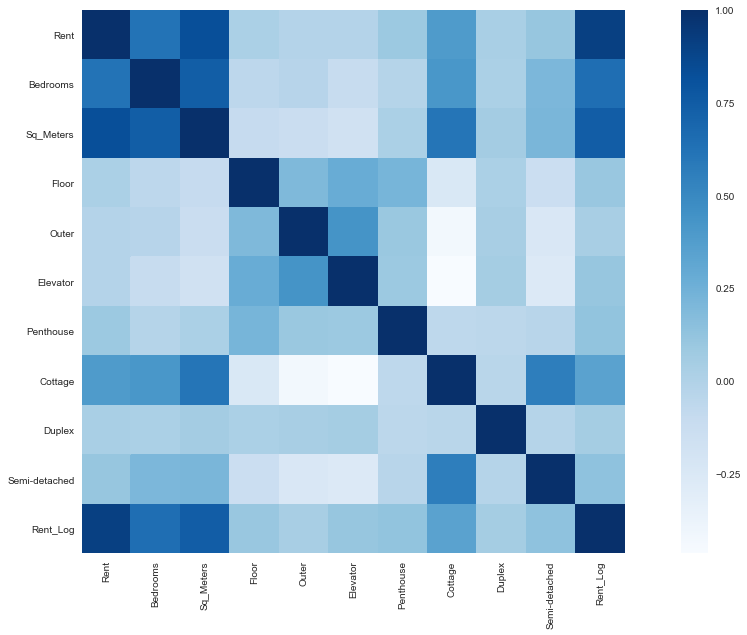

In [1080]:
corrmat = df.corr(method='pearson')
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, square=True, cmap='Blues')

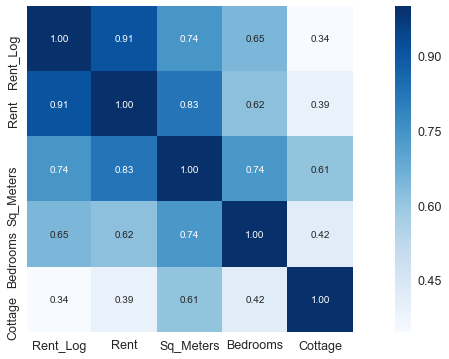

In [1119]:
plt.figure(figsize=(15,6))
k = 5
cols = corrmat.nlargest(k, 'Rent_Log')['Rent_Log'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, 
                 xticklabels=cols.values, cmap='Blues')
plt.show()

Here we can see that a few variables seem to be correlation that do not include rent: square meters & bedrooms and square meters and cottage.

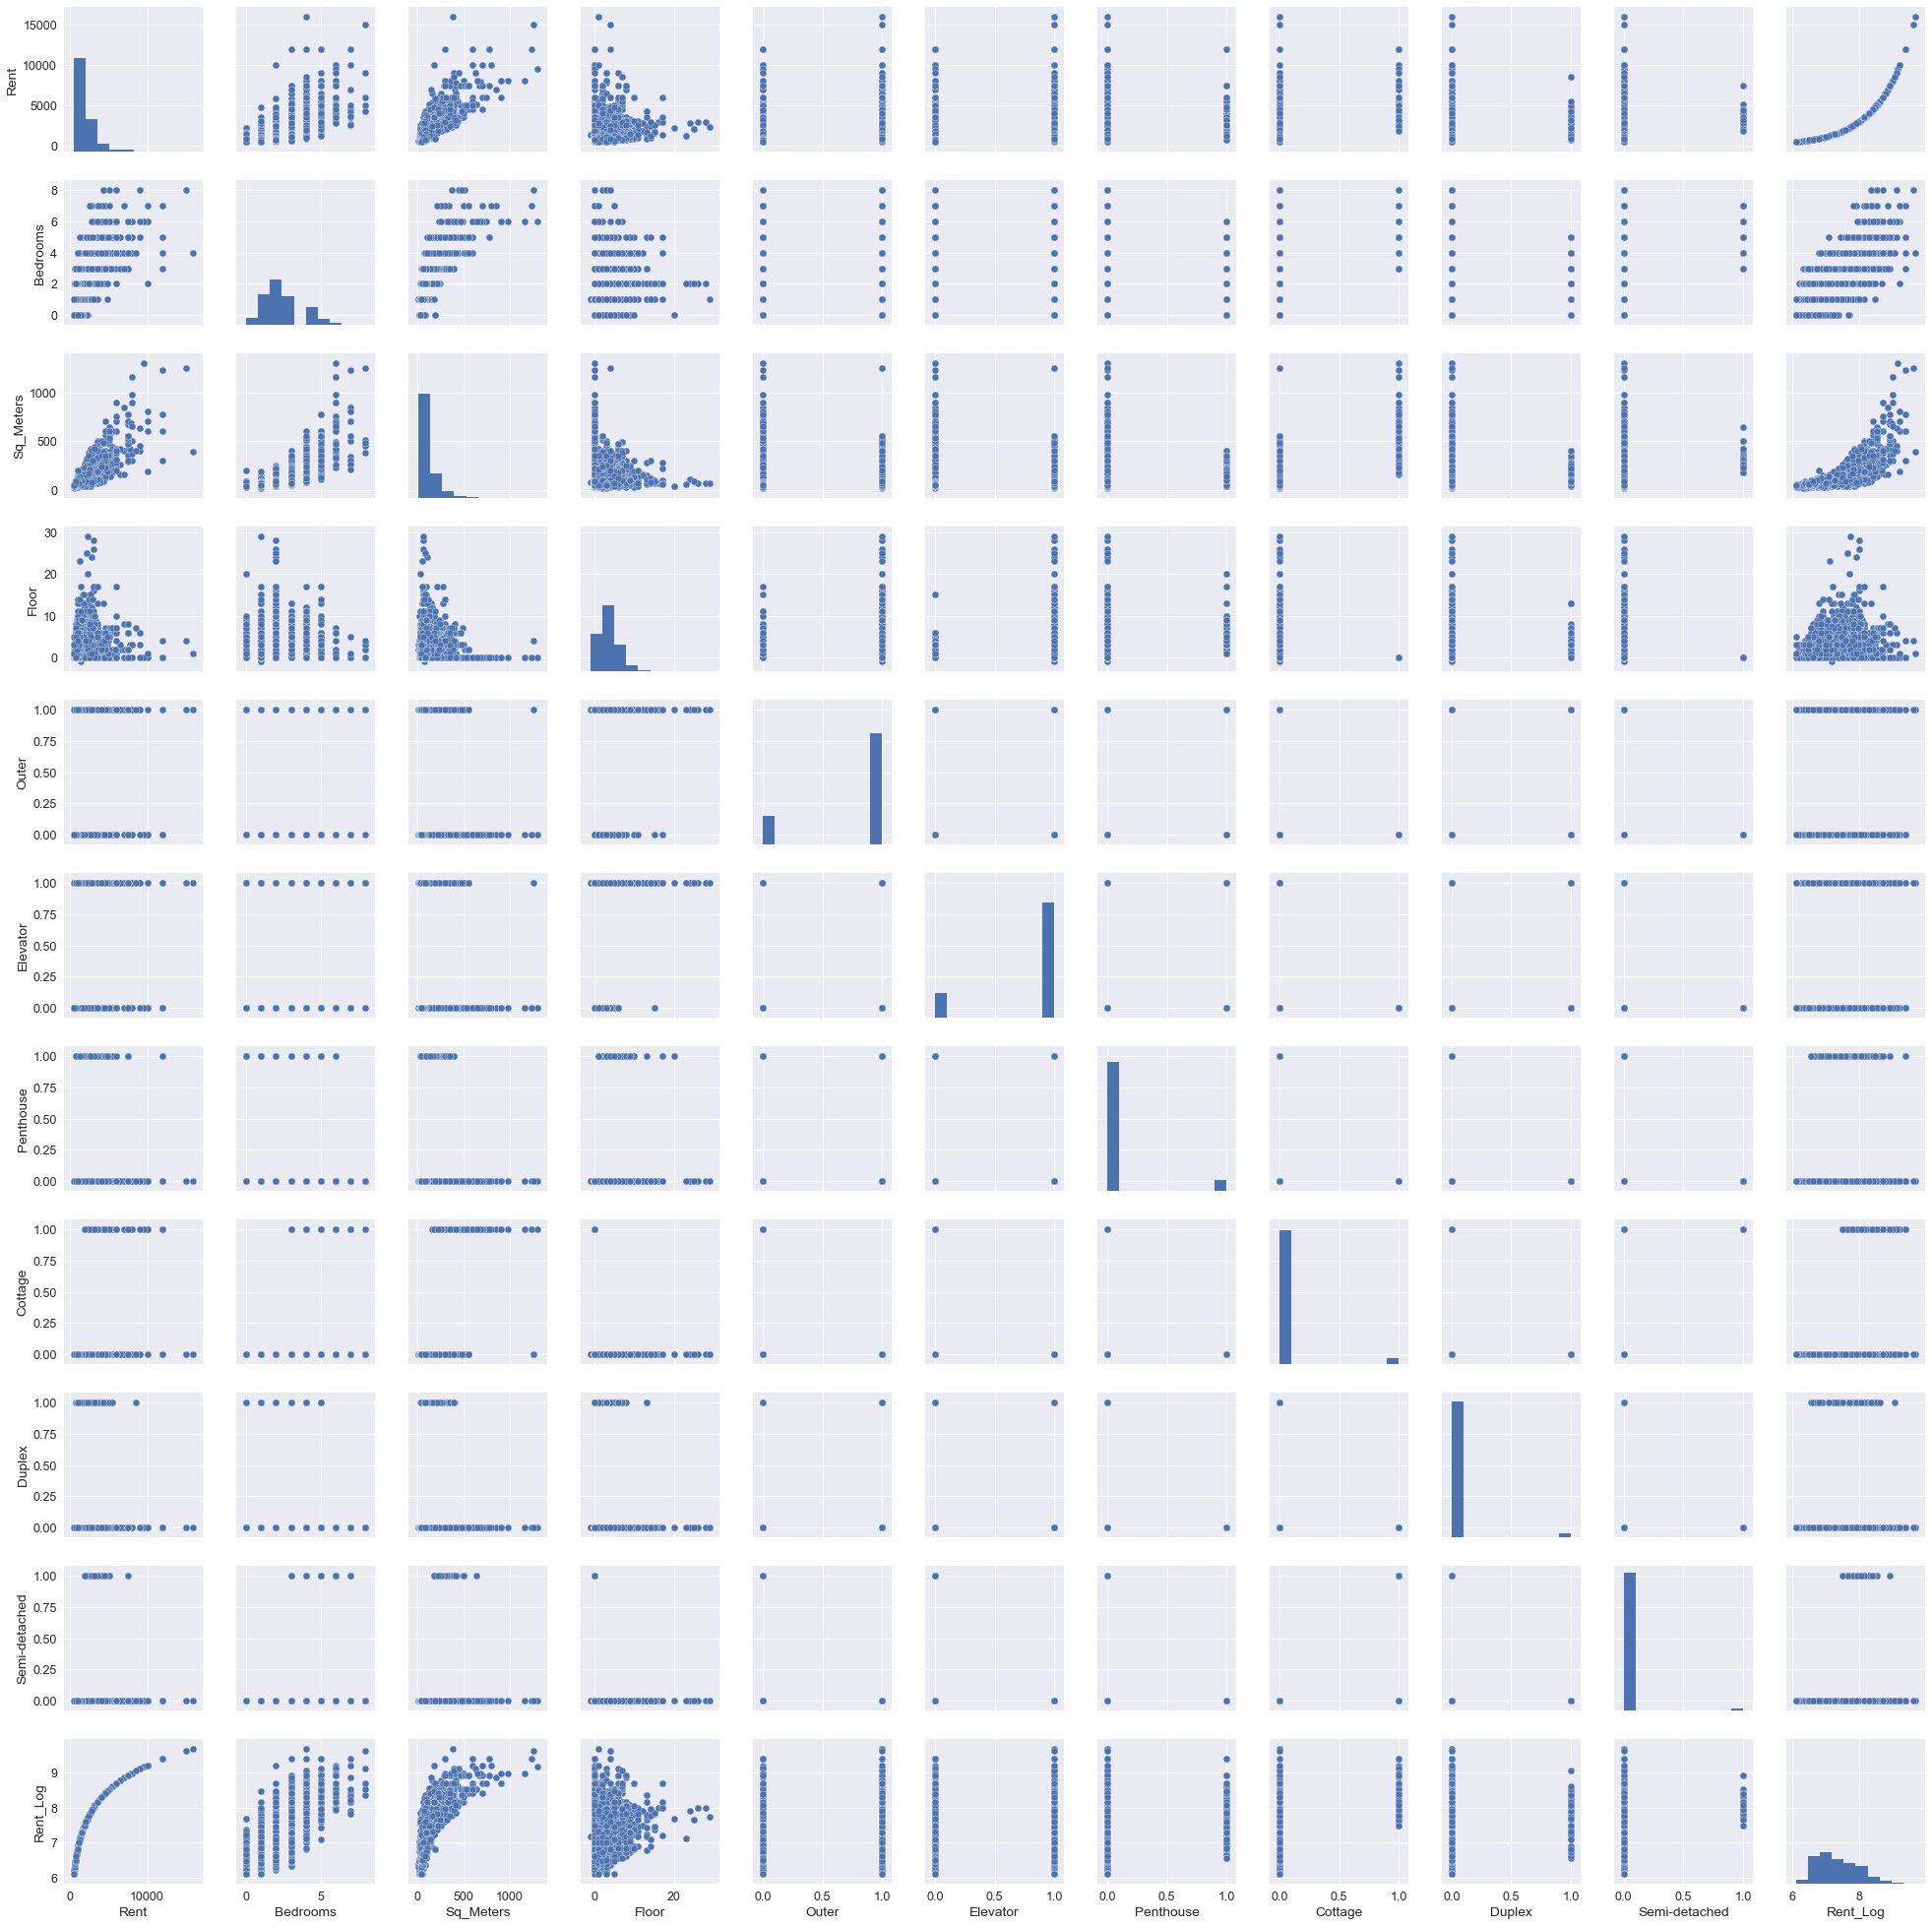

In [1082]:
sns.pairplot(df)
plt.tick_params(labelsize=20)
plt.show()

Bedrooms seems to be correlated with square meters.

Correlation between Bedrooms and Square Meters:  (0.73836869282882023, 0.0)


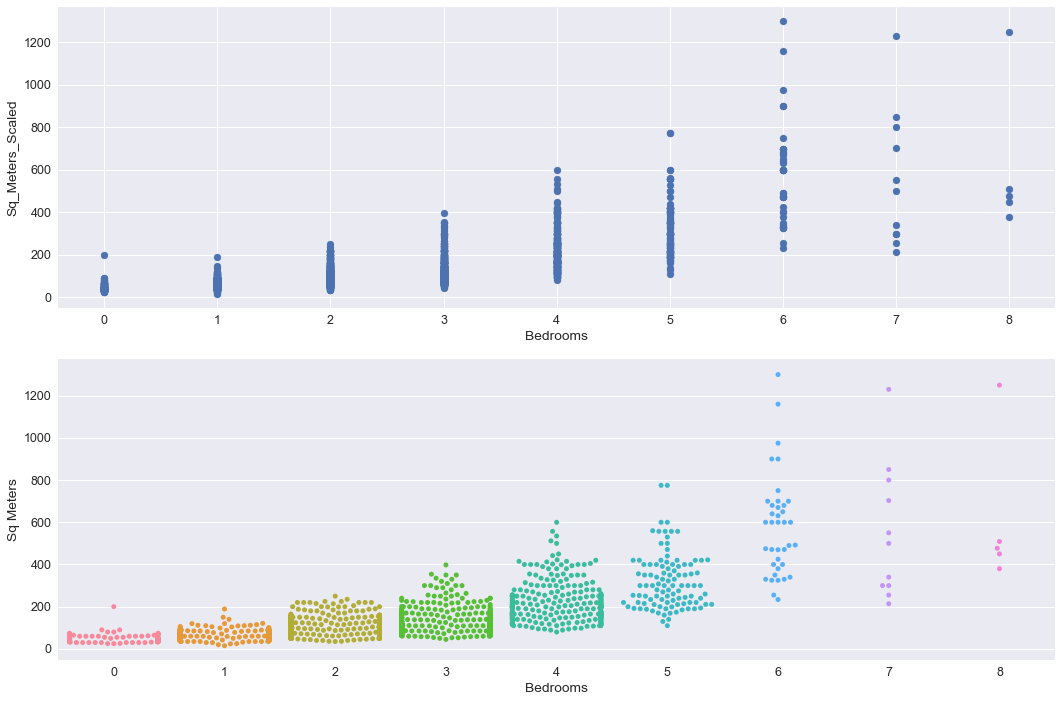

In [1083]:
from scipy.stats.stats import pearsonr

print("Correlation between Bedrooms and Square Meters: ", pearsonr(df['Bedrooms'], df['Sq_Meters']))

plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.scatter(df.Bedrooms, df.Sq_Meters)
plt.xlabel('Bedrooms')
plt.ylabel('Sq_Meters_Scaled')

plt.subplot(2,1,2)
sns.swarmplot(df.Bedrooms, df.Sq_Meters)
plt.xlabel('Bedrooms')
plt.ylabel('Sq Meters')

plt.tight_layout()
plt.show()

Create a feature for properties that have over five rooms since they don't seem to increase.

In [1084]:
df['Over_Five_Bedrooms'] = df.Bedrooms > 5
df.Over_Five_Bedrooms = df.Over_Five_Bedrooms.replace(True, 1)

df['Studio'] = df.Bedrooms == 0
df.Studio = df.Studio.replace(True, 1)

In [1085]:
df.head()

,Area,Address,Zone,Rent,Bedrooms,Sq_Meters,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semi-detached,Rent_Log,Over_Five_Bedrooms,Studio
0,ciudad lineal,Piso en Quintana,Quintana,1300,2,72,3,1,1,0,0,0,0,7.170888,0.0,0.0
1,ciudad lineal,Piso en calle de Arturo Soria,Costillares,3000,5,260,2,1,1,0,0,0,0,8.006701,0.0,0.0
2,ciudad lineal,Piso en calle de Vicente Muzas,Colina,1300,2,100,3,1,1,0,0,0,0,7.170888,0.0,0.0
3,ciudad lineal,Piso en calle Badajoz,San Pascual,1600,3,120,4,1,1,0,0,0,0,7.378384,0.0,0.0
4,ciudad lineal,Piso en calle de Nuestra Señora del Villar,Ventas,800,2,60,3,1,0,0,0,0,0,6.685861,0.0,0.0


Text(0.5,0,'Log Square Meters')

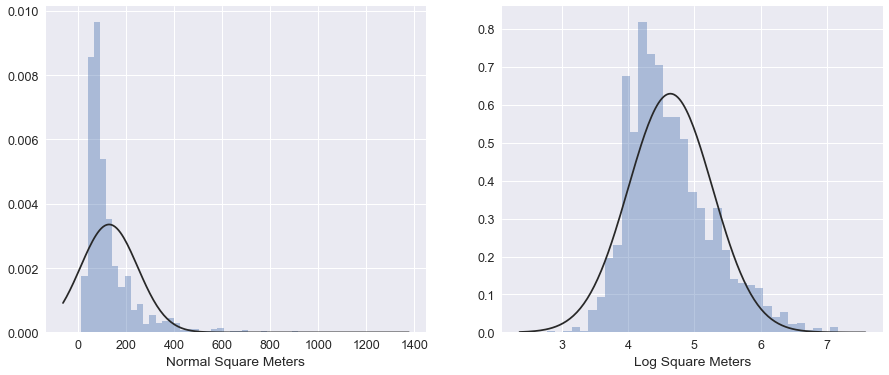

In [1086]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.distplot(df.Sq_Meters, kde=False, fit = norm)
plt.xlabel('Normal Square Meters')

plt.subplot(1, 2, 2)
sns.distplot(np.log1p(df.Sq_Meters), kde=False, fit = norm)
plt.xlabel('Log Square Meters')

In [1087]:
df['Sq_Meters_Scaled'] = np.log1p(df.Sq_Meters)

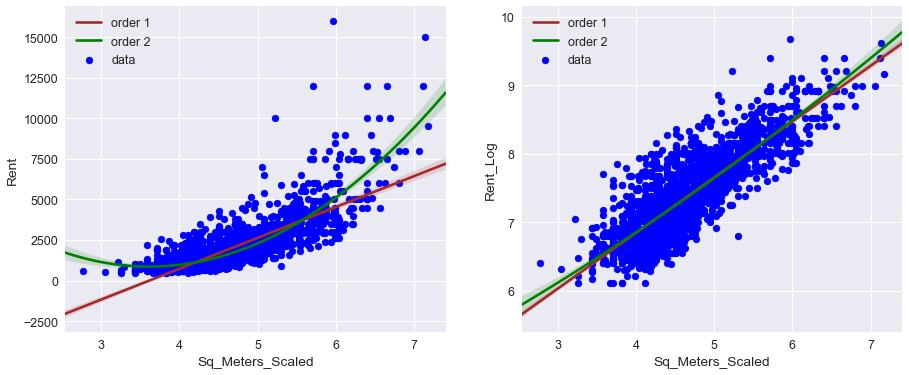

In [1088]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.scatter(df['Sq_Meters_Scaled'], df['Rent'], label='data', color='blue', marker='o')
sns.regplot(x='Sq_Meters_Scaled', y='Rent', data=df, scatter=None, color='brown', label='order 1', order=1)
sns.regplot(x='Sq_Meters_Scaled', y='Rent', data=df, scatter=None, color='green', label='order 2', order=2)
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.scatter(df['Sq_Meters_Scaled'], df['Rent_Log'], label='data', color='blue', marker='o')
sns.regplot(x='Sq_Meters_Scaled', y='Rent_Log', data=df, scatter=None, color='brown', label='order 1', order=1)
sns.regplot(x='Sq_Meters_Scaled', y='Rent_Log', data=df, scatter=None, color='green', label='order 2', order=2)
plt.legend(loc='upper left')
plt.show()

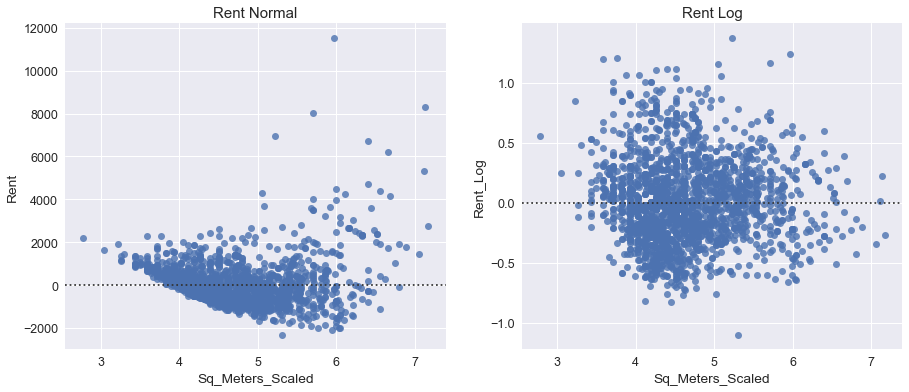

In [1089]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.residplot(x='Sq_Meters_Scaled', y='Rent', data=df)
plt.title('Rent Normal')

plt.subplot(1,2,2)
sns.residplot(x='Sq_Meters_Scaled', y='Rent_Log', data=df)
plt.title('Rent Log')

plt.show()

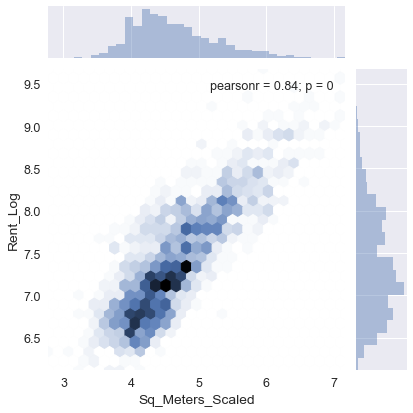

In [1090]:
sns.jointplot(x='Sq_Meters_Scaled', y='Rent_Log', data=df, kind='hex')

We can get a high correlation when we transform both Rent and Sq Meters.

<h3>Transforming the Data</h3>

In [1091]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2187 entries, 0 to 2187
Data columns (total 17 columns):
Area                  2187 non-null object
Address               2187 non-null object
Zone                  2187 non-null object
Rent                  2187 non-null int64
Bedrooms              2187 non-null int64
Sq_Meters             2187 non-null int64
Floor                 2187 non-null int64
Outer                 2187 non-null int64
Elevator              2187 non-null int64
Penthouse             2187 non-null int64
Cottage               2187 non-null int64
Duplex                2187 non-null int64
Semi-detached         2187 non-null int64
Rent_Log              2187 non-null float64
Over_Five_Bedrooms    2187 non-null float64
Studio                2187 non-null float64
Sq_Meters_Scaled      2187 non-null float64
dtypes: float64(4), int64(10), object(3)
memory usage: 387.5+ KB


In [1098]:
X = df[['Area', 'Zone', 'Bedrooms', 'Sq_Meters_Scaled', 'Floor', 'Outer', 'Elevator', 'Penthouse', 'Cottage', 'Duplex', 'Semi-detached', 'Over_Five_Bedrooms', 'Studio']]
y = df['Rent_Log']

print("X shape: {}, y shape: {}".format(X.shape, y.shape))

X shape: (2187, 13), y shape: (2187,)


Now we can try some interactions between variables.

In [1099]:
X['Bedrooms_SqMeters'] = X.Bedrooms * X.Sq_Meters_Scaled
X['Bedrooms_Floor'] = X.Bedrooms * X.Floor
X['SqMeters_Floor'] = X.Sq_Meters_Scaled * X.Floor
X['All_Combo'] = X.Bedrooms * X.Sq_Meters_Scaled * X.Floor

X.head()

/Users/cris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/cris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/cris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

,Area,Zone,Bedrooms,Sq_Meters_Scaled,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semi-detached,Over_Five_Bedrooms,Studio,Bedrooms_SqMeters,Bedrooms_Floor,SqMeters_Floor,All_Combo
0,ciudad lineal,Quintana,2,4.290459,3,1,1,0,0,0,0,0.0,0.0,8.580919,6,12.871378,25.742757
1,ciudad lineal,Costillares,5,5.564520,2,1,1,0,0,0,0,0.0,0.0,27.822602,10,11.129041,55.645204
2,ciudad lineal,Colina,2,4.615121,3,1,1,0,0,0,0,0.0,0.0,9.230241,6,13.845362,27.690723
3,ciudad lineal,San Pascual,3,4.795791,4,1,1,0,0,0,0,0.0,0.0,14.387372,12,19.183162,57.549487
4,ciudad lineal,Ventas,2,4.110874,3,1,0,0,0,0,0,0.0,0.0,8.221748,6,12.332622,24.665243


In [1100]:
X[['Bedrooms_SqMeters', 'Bedrooms_Floor', 'SqMeters_Floor', 'All_Combo']].max()

Bedrooms_SqMeters     57.053588
Bedrooms_Floor        85.000000
SqMeters_Floor       121.499988
All_Combo            458.843830
dtype: float64

In [1101]:
X = pd.get_dummies(X)
print(X.shape)

(2187, 175)


<h3>Linear Regression</h3>

In [1102]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import RobustScaler


lm = LinearRegression()
kfolds = KFold(n_splits=5, shuffle=True, random_state=7)

def cv_rmse(model):
    '''function to display RMSE'''
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = kfolds))
    return(rmse)

In [1124]:
linear_model = lm.fit(X, y)
print("RMSE : %.3f" % (cv_rmse(lr_model).mean()))

RMSE : 66880290.933


In [1104]:
coeffs = pd.DataFrame(list(zip(X.columns, benchmark_model.coef_)), columns=['Predictors', 'Coefficients'])

coeffs.sort_values(by='Coefficients', ascending=False)

,Predictors,Coefficients
0,Bedrooms,3.419600e+11
60,Zone_Castellana,1.399208e+11
10,Studio,8.275501e+10
7,Duplex,5.591185e+10
5,Penthouse,4.527675e+10
89,Zone_Horcajo,3.317508e+10
9,Over_Five_Bedrooms,3.183913e+10
93,Zone_Jerónimos,3.128559e+10
47,Zone_Argüelles,3.078675e+10
77,Zone_Entrevías,2.439161e+10


<h3>Polynomial Regression</h3>

In [1105]:
from sklearn.preprocessing import PolynomialFeatures


# PolynomialFeatures (prepreprocessing)
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)

In [1106]:
poly_model = lm.fit(X_, y)
print("RMSE : %.3f" % (cv_rmse(poly_model).mean()))

poly_model.coef_

RMSE : 74853647.978


array([  1.73343796e+09,  -2.82499248e+07,  -5.26537444e+06, ...,
        -1.39080636e+04,   0.00000000e+00,   1.05971521e+05])

<h3>Ridge Regression</h3>

In [1107]:
from sklearn.linear_model import RidgeCV


def ridge_selector(k):
    ridge_model = RidgeCV(alphas = [k], cv=kfolds).fit(X, y)
    
    ridge_rmse = cv_rmse(ridge_model).mean()
    return(ridge_rmse)

In [1108]:
r_alphas = np.linspace(.0001, 10, 20)

ridge_scores = []
for alpha in r_alphas:
    score = ridge_selector(alpha)
    ridge_scores.append(score)

,RMSE
0.000100,0.238755
0.526411,0.237691
1.052721,0.237238
1.579032,0.237037
2.105342,0.236972
2.631653,0.236992
3.157963,0.237069
3.684274,0.237188
4.210584,0.237337
4.736895,0.237510


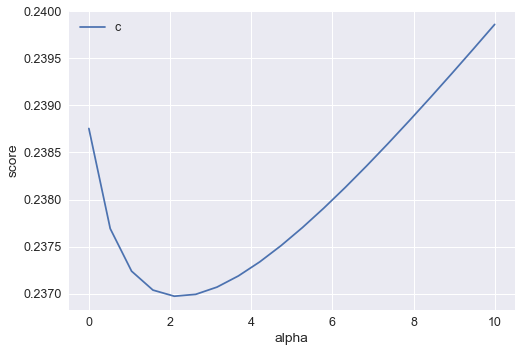

In [1109]:
plt.plot(r_alphas, ridge_scores, label='Ridge')
plt.legend('center')
plt.xlabel('alpha')
plt.ylabel('score')

ridge_score_table = pd.DataFrame(ridge_scores, r_alphas, columns=['RMSE'])
ridge_score_table

In [1110]:
r_alphas = np.linspace(1.5, 2.5, 20)

ridge_scores = []
for alpha in r_alphas:
    score = ridge_selector(alpha)
    ridge_scores.append(score)

,RMSE
1.500000,0.237057
1.552632,0.237043
1.605263,0.237031
1.657895,0.237020
1.710526,0.237011
1.763158,0.237002
1.815789,0.236995
1.868421,0.236989
1.921053,0.236983
1.973684,0.236979


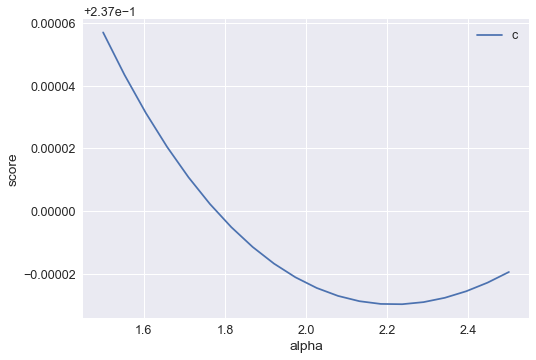

In [1111]:
plt.plot(r_alphas, ridge_scores, label='Ridge')
plt.legend('center')
plt.xlabel('alpha')
plt.ylabel('score')

ridge_score_table = pd.DataFrame(ridge_scores, r_alphas, columns=['RMSE'])
ridge_score_table

In [1116]:
from sklearn.linear_model import Ridge


ridge_model = Ridge(alpha=2.184211).fit(X, y)

cv_rmse(ridge_model).mean()

0.23697050691102181

<h3>Lasso Regression</h3>

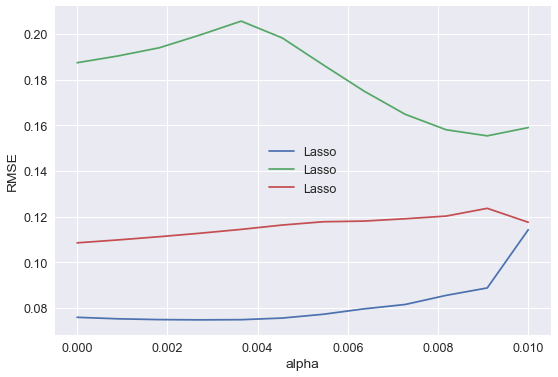

In [1113]:
from sklearn.linear_model import LassoCV



alphas = np.linspace(0.000001, 0.01, 12)
#[0.00005, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
           #0.0006, 0.0007, 0.0008]


lasso_model = LassoCV(max_iter=1e7, alphas = alphas, random_state = 42).fit(X, y)

scores = lasso_model.mse_path_

plt.plot(alphas, scores, label='Lasso')
plt.legend(loc='center')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.tight_layout()
plt.show()

In [1114]:
cv_rmse(lasso_model).mean()

0.26753318345971522

In [1123]:
from sklearn.linear_model import Lasso


lasso_model = Lasso(max_iter=1e7, alpha=.001, random_state = 42).fit(X, y)
cv_rmse(lasso_model).mean()

0.24461563506246548

<h3>XGBoost</h3>

In [1040]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
%matplotlib inline
import xgboost as xgb
from xgboost import XGBRegressor

In [1120]:
xgb3 = XGBRegressor(learning_rate =0.01, n_estimators=3460, max_depth=3,
                     min_child_weight=0 ,gamma=0, subsample=0.7,
                     colsample_bytree=0.7,objective= 'reg:linear',
                     nthread=4,scale_pos_weight=1,seed=27, reg_alpha=0.00006)

xgb_model = xgb3.fit(X, y)

In [1121]:
cv_rmse(xgb_model).mean()

0.23605374844046753

In [313]:
param_grid = {
    'colsample_bytree': [0.4,0.6,0.8],
    'gamma': [0, 1],
    'min_child_weight': [1.5,6,10],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [1,3,5],
    'n_estimators': [7500, 12000, 15000],
    'subsample': [0.6,0.95]  
}

xgb = XGBRegressor() 
grid = RandomizedSearchCV(xgb, param_grid, verbose = 3)
grid = grid.fit(X, y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] subsample=0.6, n_estimators=12000, min_child_weight=10, max_depth=5, learning_rate=0.01, gamma=1, colsample_bytree=0.4 
[CV]  subsample=0.6, n_estimators=12000, min_child_weight=10, max_depth=5, learning_rate=0.01, gamma=1, colsample_bytree=0.4, score=0.7657328761446474, total=  43.4s
[CV] subsample=0.6, n_estimators=12000, min_child_weight=10, max_depth=5, learning_rate=0.01, gamma=1, colsample_bytree=0.4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   43.6s remaining:    0.0s


[CV]  subsample=0.6, n_estimators=12000, min_child_weight=10, max_depth=5, learning_rate=0.01, gamma=1, colsample_bytree=0.4, score=0.5742923813492677, total=  43.2s
[CV] subsample=0.6, n_estimators=12000, min_child_weight=10, max_depth=5, learning_rate=0.01, gamma=1, colsample_bytree=0.4 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.4min remaining:    0.0s


[CV]  subsample=0.6, n_estimators=12000, min_child_weight=10, max_depth=5, learning_rate=0.01, gamma=1, colsample_bytree=0.4, score=0.6765639006781076, total=  43.5s
[CV] subsample=0.6, n_estimators=7500, min_child_weight=1.5, max_depth=5, learning_rate=0.001, gamma=1, colsample_bytree=0.4 
[CV]  subsample=0.6, n_estimators=7500, min_child_weight=1.5, max_depth=5, learning_rate=0.001, gamma=1, colsample_bytree=0.4, score=0.7469623031296988, total=  25.5s
[CV] subsample=0.6, n_estimators=7500, min_child_weight=1.5, max_depth=5, learning_rate=0.001, gamma=1, colsample_bytree=0.4 
[CV]  subsample=0.6, n_estimators=7500, min_child_weight=1.5, max_depth=5, learning_rate=0.001, gamma=1, colsample_bytree=0.4, score=0.5301600160449516, total=  25.5s
[CV] subsample=0.6, n_estimators=7500, min_child_weight=1.5, max_depth=5, learning_rate=0.001, gamma=1, colsample_bytree=0.4 
[CV]  subsample=0.6, n_estimators=7500, min_child_weight=1.5, max_depth=5, learning_rate=0.001, gamma=1, colsample_bytree=

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 20.6min finished


In [322]:
grid.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 1,
 'min_child_weight': 1.5,
 'n_estimators': 7500,
 'subsample': 0.95}

In [1043]:
xgbm = XGBRegressor(colsample_bytree=0.6,gamma=0, learning_rate=0.01, max_depth=1, min_child_weight=1.5, 
                    n_estimators=7500, subsample=0.95)
final_model =xgbm.fit(X, y)
cv_rmse(final_model).mean()

0.24355337698137269